In [15]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ttest_ind

Bike sharing data set collected from UCI [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) 

In [4]:
#Import dataset
df = pd.read_csv('Bike-Sharing.csv')
df


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Here is a list with a short description of the columns :

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## 1) The country you live in has been steadily implementing policies to reduce green house gas emissions. 

## You want to check if the policies have had an effect. To do this, you chose to analyze the data that you've collected on biking habits over the last two weeks. You want to see if there is a statistically significant difference in registered bikers from the previous year which had a national average of 3200 registered bikers.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

#### Hypothesis: There is a statistical difference between registered bikers in year 0 versus year 1.
Rather, Year 1 has a statistically higher mean than year 0
To test this hypothisis we will use the paired T-test. 

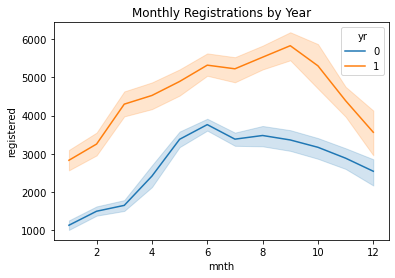

In [39]:
# First Displaying that there is a difference between the two different years.
sns.lineplot(x="mnth", y="registered", hue="yr", data=df).set_title("Monthly Registrations by Year")
plt.show()

[]

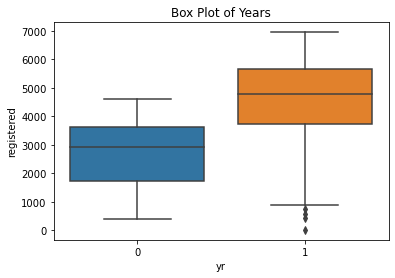

In [7]:
sns.boxplot(data=df, x="yr", y="registered").set_title("Box Plot of Years")
plt.plot()

In [21]:
# Now for the hypothis testing. Splitting the data frame into two different years
df_yr1 = df[df['yr'] == 0].copy()
df_yr2 = df[df['yr'] == 1].copy()
df_yr1['registered'].describe()

count     365.000000
mean     2728.358904
std      1060.110413
min       416.000000
25%      1730.000000
50%      2915.000000
75%      3632.000000
max      4614.000000
Name: registered, dtype: float64

In [20]:
df_yr2['registered'].describe()

count     366.000000
mean     4581.450820
std      1424.331846
min        20.000000
25%      3730.500000
50%      4776.500000
75%      5663.000000
max      6946.000000
Name: registered, dtype: float64

In [22]:
np.var(df_yr1['registered'])/np.var(df_yr2['registered'])

0.5539576597754988

##### Levene test/ The assumption of equality of variance.
H0: That all groups have equal varianecs <br>
HA: one pair of the group has unqeual variances.

In [47]:

stats.levene(df_yr1['registered'], df_yr2['registered'])
# P value is huge meaning that there is homeogeneity of the variances and we can procede

LeveneResult(statistic=16.2275714534023, pvalue=6.20638255879191e-05)

We can assume the population variances are equal because the ratio is below 4

#### T-Test: This test is used to compare the mean of 2 given samples to test if they are equal.
Because we want to see if year 0 and 1 one are different we use the two sample t-test to look at the population means to see if they are the same or not. <br>
The graphs above clearly show that year 1 is higher than year 0 but for the sake of proving this statistically we runn the test <br>
H0 The population mean of year 0 and year 1 are equal <br>
HA The population mean of year 0 is different than year 1 <br>

In [34]:
ttest_stats = ttest_ind(df_yr1['registered'], df_yr2['registered'], alternative='smaller')  # Alternative is to test that yr0 is smaller than year 1
print("T-Stat", ttest_stats[0])
print("pvalue", ttest_stats[1])
print("Degrees of Freedom", ttest_stats[2])

T-Stat -19.949104605943187
pvalue 2.734837789814487e-71
Degrees of Freedom 729.0


The Pvalue is below 0.05 we can reject the null hypothesis. We do have sufficent evidence that the mean of year 0 is different than year 1. Year 1 is greater. Meaning that there are more registered bike users in year 1.

## 2) You now want to see if there is a statistically different level of registered ridership between Monday and Tuesday.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

In [45]:
df_monday = df[df['weekday'] == 0].copy()
df_tuesday = df[df['weekday'] == 1].copy()

[]

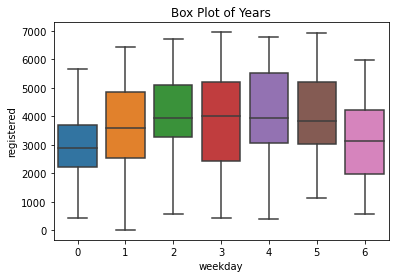

In [42]:
# Box plotting the the registed users by the weekday to see where Monday and Tuesday Lie. Monday being 0 and tuesday being 1
sns.boxplot(data=df, x="weekday", y="registered").set_title("Box Plot of Years")
plt.plot()

In [46]:
# Testing the difference in  the variance
np.var(df_monday['registered'])/np.var(df_tuesday['registered'])
# Less than 4:1 so we can conclude that the variance is the same

0.6150811146946008

### Levene test/ The assumption of equality of variance.
H0: That all groups have equal varianecs <br>
HA: one pair of the group has unqeual variances. <br>

In [48]:
stats.levene(df_monday['registered'], df_tuesday['registered'])
# Low P Value test meaning that we reject the null hypothese s and conclude that one pair of the group has unequal variances. These means are not independent of each other

LeveneResult(statistic=5.472577810588735, pvalue=0.02026545400361274)

#### T-Test: This test is used to compare the mean of 2 given samples to test if they are equal.

In [52]:
ttest_stats = ttest_ind(df_monday['registered'], df_tuesday['registered'], alternative='smaller')  # Alternative is to test that yr0 is smaller than year 1
print("T-Stat", ttest_stats[0])
print("pvalue", ttest_stats[1])
print("Degrees of Freedom", ttest_stats[2])


T-Stat -4.1459451530122795
pvalue 2.4633724921358506e-05
Degrees of Freedom 208.0


The Pvalue is below 0.05 we can reject the null hypothesis. We do have sufficent evidence that the mean of monday is different than tuesday. Tuesday is greater. Meaning that there are more registered bike users on Tuesday than Monday

## 3) Say you've conducted a poll in 5 different states and you want to know if there is a relationship between the state and the political party for which people vote.

You must follow the steps for hypothesis testing, you may assume that the data provided (the one you "collected") was randomly sampled from the population. 

You must formulate a hypothesis and test it. Please provide justification for the test you're using along with explanation of results. 

#### Hypothesis: 


In [69]:
#Import dataset
voting = pd.read_csv('simplified_voting.csv')
voting.drop(columns=voting.columns[0], axis=1, inplace=True)

#Displaying the Counts for the different Parties per state. 
voting_ct = pd.crosstab(voting['State'], voting['Party'])
voting_ct

Party,democrat,independent,republican
State,,,
Colorado,21,10,29
Florida,58,37,59
Iowa,166,145,186
Michigan,96,68,87
Minnesota,14,11,13


In [96]:
# Will want to look at the chi square test to see if there is a difference between state and party
chi2_stat, p_val, dof, ex = stats.chi2_contingency(voting_ct)
#Print out the results
print("Chi2 Stat",chi2_stat)
print("Degrees of Freedom", dof)
print("Pvalue",p_val)


print("===Contingency Table===")
dfex = pd.DataFrame(ex, index = voting_ct.index, columns = voting_ct.columns)
dfex    # contingency table, ex, is the table of expected values we calculated above


Chi2 Stat 7.720359756241246
Degrees of Freedom 8
Pvalue 0.4612519349606007
===Contingency Table===


Party,democrat,independent,republican
State,,,
Colorado,21.300,16.260,22.440
Florida,54.670,41.734,57.596
Iowa,176.435,134.687,185.878
Michigan,89.105,68.021,93.874
Minnesota,13.490,10.298,14.212


In [95]:
print("===Actual Values===")
voting_ct

===Actual Values===


Party,democrat,independent,republican
State,,,
Colorado,21,10,29
Florida,58,37,59
Iowa,166,145,186
Michigan,96,68,87
Minnesota,14,11,13


To look at the difference between the states and their voting parties we use the Chi-Square tests.
This test is used to determine hether there is a significnt difference betwen an expected distribution and an actual ditribution. 
THe P value will tell us if there is independence. 

H0: There is no relation between the variables.
HA: There is a significant relationship between the two variables.

The P value of .46125 > 0.05 so we cannot reject the null hypothesis. We cannot say the mean values are different for the different parties.
Meaning that we cannot say that there is a difference amongs the states and the voting parties. 